# World Happiness Report Project

# Project Description

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

# What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.


# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

# Importing DataSet

In [2]:
df=pd.read_csv('happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


top 10 rows of the dataset

In [4]:
df.tail(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


last 10 rows of the dataset

In [5]:
df.shape

(158, 12)

This dataset has 158 rows and 12 columns. Where one columns is label or dependent variable and other 11 are independent or input variables  

# Exploratory Data Analysis

In [6]:
df.columns.tolist()

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [7]:
#checking for the data types present in the columns
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

Here we can see that there are three types of data present in the dataset ['object', 'int64', 'float64']

In [8]:
#checking for the null values 
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

so we can say that there are no null value present in the dataset

<AxesSubplot:>

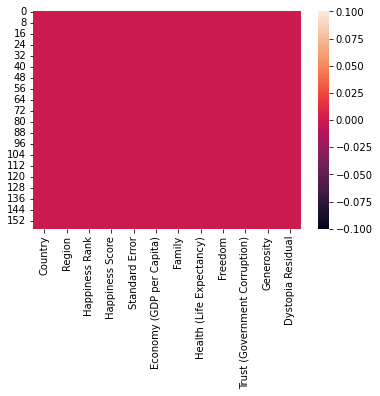

In [9]:
#Graphical visualization for the null value
sns.heatmap(df.isnull())

Here we can clearly see that there is no null values present in the dataset

In [10]:
#for the general informaton of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

Here we can see the basic information about the dataset like types of dataset present in the column number of rows null values and memory occupied by the dataset.

In [11]:
df.value_counts('Happiness Score')

Happiness Score
5.192    2
2.839    1
5.948    1
5.828    1
5.833    1
        ..
4.786    1
4.788    1
4.800    1
4.839    1
7.587    1
Length: 157, dtype: int64

In [12]:
df['Happiness Score'].nunique()

157

we can clearly see here from 158 value 157 values are unique 

In [13]:
#Checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64


Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: Happiness Rank, Length: 157, dtype: int64


5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64


0.03780    2
0.03751    2
0.04394    2
0

Seprating Numerical and categorical column

In [14]:
#checking for categorical columns

categorical_col=[]
for i in df.columns:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print('categorical columns:',categorical_col)
print('\n')

categorical columns: ['Country', 'Region']




In [15]:
#checking numerical columns

numerical_col=[]
for i in df.columns:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print('numerical columns:',numerical_col)

numerical columns: ['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


Here we can see that which column is numerical type and which column is categorical type

# Description of dataset

In [16]:
#statistical summary of numerical columns
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Observation=

1. The summary of the dataset looks perfect since there is no negative/invalid values present.


2. The number of rows present in the dataset is same in each column wich means there is no null value present.


3. In all the columns mean is approximately equal to median so we can say that there may not be any skewness present in the dataset. 


4. In all the columns the difference between 75% and max is present so there may be outlier present.


5. we can also notice the standard deviation(std.), max., min., 25% percentile, 50% percentile, 75% percentile values from this describe method.

# Data Visualization

# Univariate Analysis

Here we can see the graphical visualization of various variables present in the dataset.

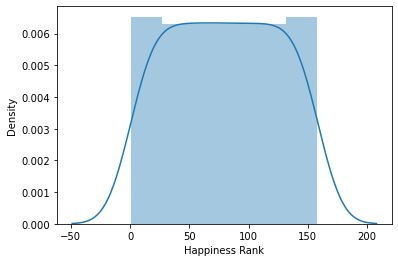

In [17]:
#visualizing "Happiness Rank"
sns.distplot(df['Happiness Rank'])
plt.show()

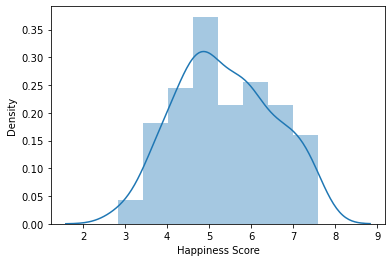

In [18]:
#visualizing "Happiness Score"
sns.distplot(df['Happiness Score'])
plt.show()

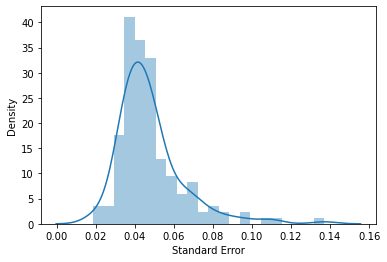

In [19]:
#visualizing "Standard Error"
sns.distplot(df['Standard Error'])
plt.show()

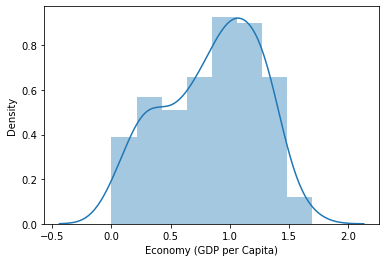

In [20]:
#visualizing "Economy (GDP per Capita)"
sns.distplot(df['Economy (GDP per Capita)'])
plt.show()

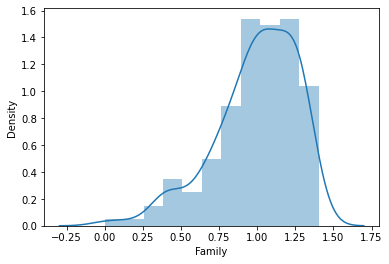

In [21]:
#visualizing "Family"
sns.distplot(df['Family'])
plt.show()

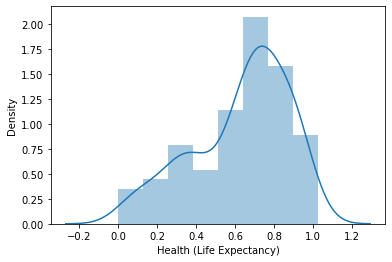

In [22]:
#visualizing "Health (Life Expectancy)"
sns.distplot(df['Health (Life Expectancy)'])
plt.show()

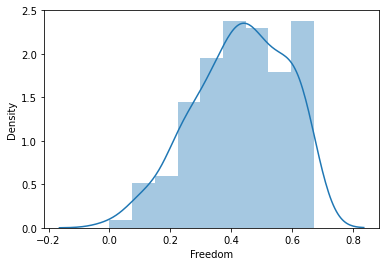

In [23]:
#visualizing "Freedom"
sns.distplot(df['Freedom'])
plt.show()

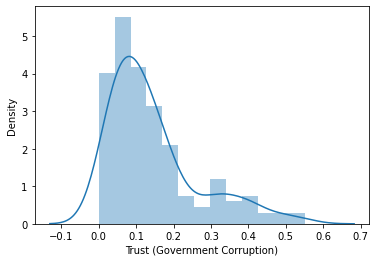

In [24]:
#visualizing "Trust (Government Corruption)"
sns.distplot(df['Trust (Government Corruption)'])
plt.show()

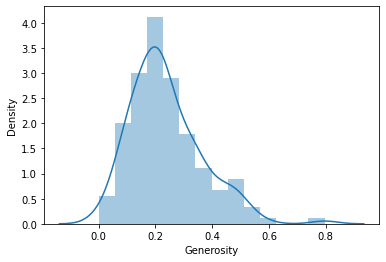

In [25]:
#visualizing "Generosity"
sns.distplot(df['Generosity'])
plt.show()

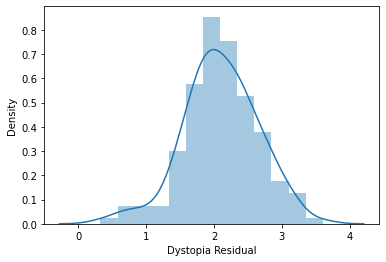

In [26]:
#visualizing "Dystopia Residual"
sns.distplot(df['Dystopia Residual'])
plt.show()

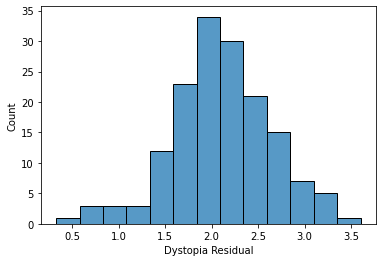

In [27]:
#visualizing "Dystopia Residual"
sns.histplot(df['Dystopia Residual'])
plt.show()

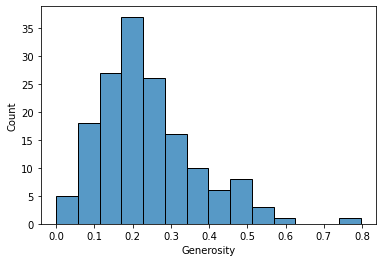

In [28]:
#visualizing "Generosity"
sns.histplot(df['Generosity'])
plt.show()

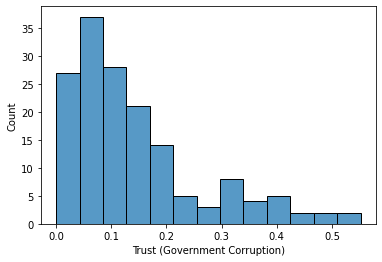

In [29]:
#visualizing "Trust (Government Corruption)"
sns.histplot(df['Trust (Government Corruption)'])
plt.show()

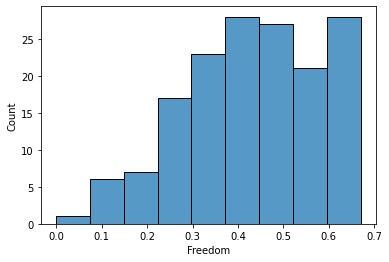

In [30]:
#visualizing "Freedom"
sns.histplot(df['Freedom'])
plt.show()

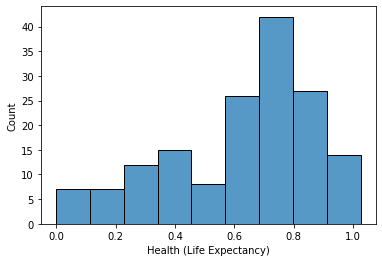

In [31]:
#visualizing "Health (Life Expectancy)"
sns.histplot(df['Health (Life Expectancy)'])
plt.show()

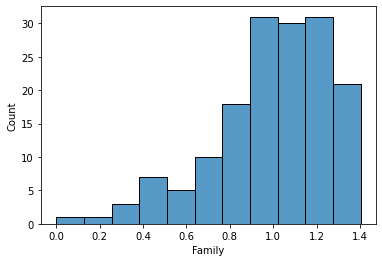

In [32]:
#visualizing "Family"
sns.histplot(df['Family'])
plt.show()

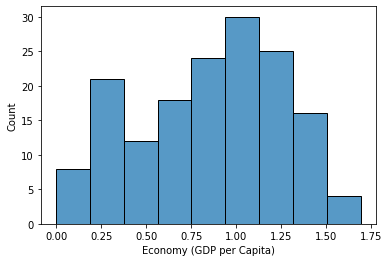

In [33]:
#visualizing "Economy (GDP per Capita)"
sns.histplot(df['Economy (GDP per Capita)'])
plt.show()

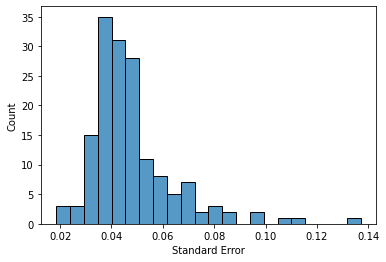

In [34]:
#visualizing "Standard Error"
sns.histplot(df['Standard Error'])
plt.show()

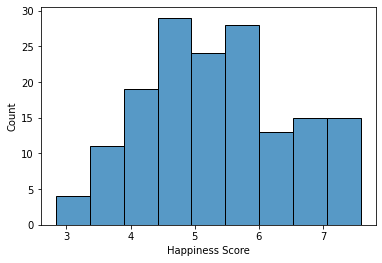

In [35]:
#visualizing "Happiness Score"
sns.histplot(df['Happiness Score'])
plt.show()

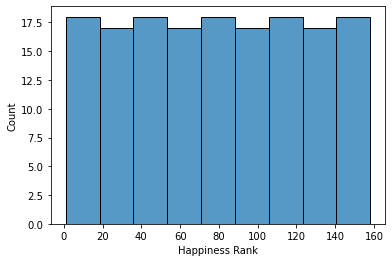

In [36]:
#visualizing "Happiness Rank"
sns.histplot(df['Happiness Rank'])
plt.show()

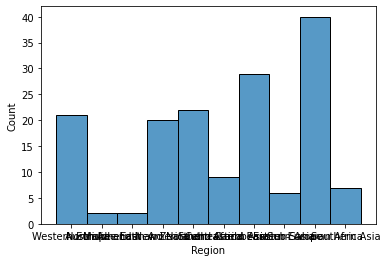

In [38]:
#visualizing "Region"
sns.histplot(df['Region'])
plt.show()

# Bivarient analysis

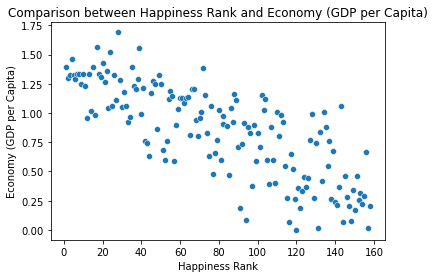

In [39]:
plt.title('Comparison between Happiness Rank and Economy (GDP per Capita)')
sns.scatterplot(x='Happiness Rank',y='Economy (GDP per Capita)', data=df, palette='bright')
plt.show()

here we can see that if 'Economy (GDP per Capita)' is increasing 'Happiness Rank' is also coming close to top position

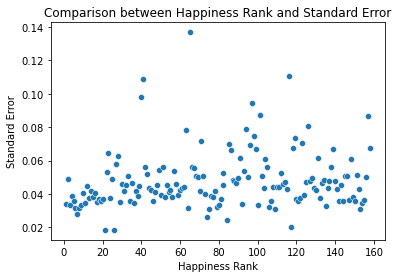

In [40]:
plt.title('Comparison between Happiness Rank and Standard Error')
sns.scatterplot(x='Happiness Rank',y='Standard Error', data=df, palette='bright')
plt.show()

here we can see that there is no stong relation between 'Happiness Rank' and 'Standard Error' 

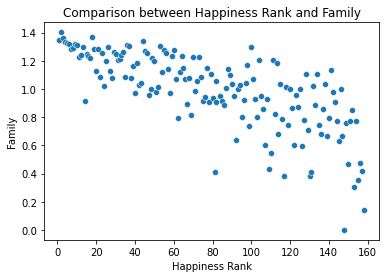

In [41]:
plt.title('Comparison between Happiness Rank and Family')
sns.scatterplot(x='Happiness Rank',y='Family', data=df, palette='bright')
plt.show()

with decrease in family variable happiness rank is increasing 

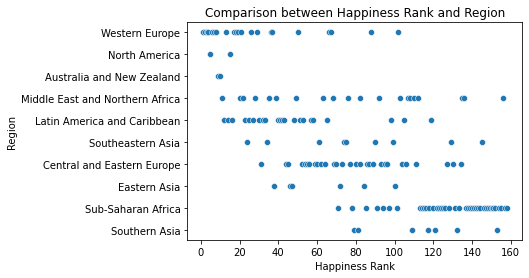

In [42]:
plt.title('Comparison between Happiness Rank and Region')
sns.scatterplot(x='Happiness Rank',y='Region', data=df, palette='bright')
plt.show()

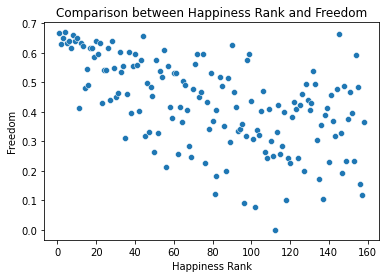

In [43]:
plt.title('Comparison between Happiness Rank and Freedom')
sns.scatterplot(x='Happiness Rank',y='Freedom', data=df, palette='bright')
plt.show()

with decrease in freedom vairable happiness rank is increase 

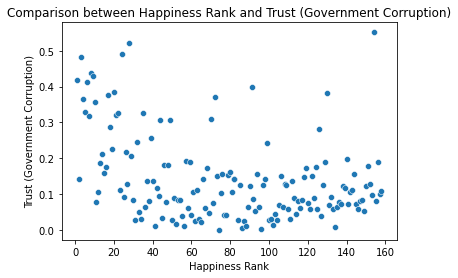

In [44]:
plt.title('Comparison between Happiness Rank and Trust (Government Corruption)')
sns.scatterplot(x='Happiness Rank',y='Trust (Government Corruption)', data=df, palette='bright')
plt.show()

Here we can see that if the country has high trust variable its ranking is also high 

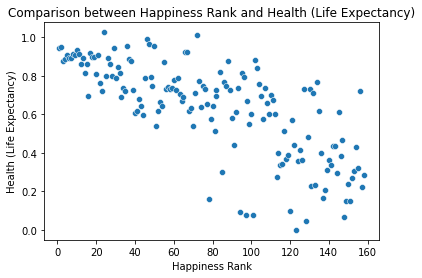

In [45]:
plt.title('Comparison between Happiness Rank and Health (Life Expectancy)')
sns.scatterplot(x='Happiness Rank',y='Health (Life Expectancy)', data=df, palette='bright')
plt.show()

with increase of health life variable happiness rank is increasing 

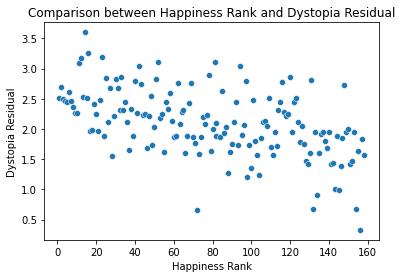

In [46]:
plt.title('Comparison between Happiness Rank and Dystopia Residual')
sns.scatterplot(x='Happiness Rank',y='Dystopia Residual', data=df, palette='bright')
plt.show()

with increase in dystopia residual variable happiness rank is increasing to the top position 

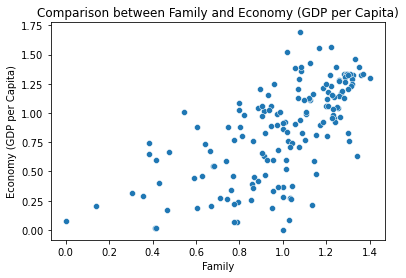

In [47]:
plt.title('Comparison between Family and Economy (GDP per Capita)')
sns.scatterplot(x='Family',y='Economy (GDP per Capita)', data=df, palette='bright')
plt.show()

with increase in family variable economy variable is also incresing 

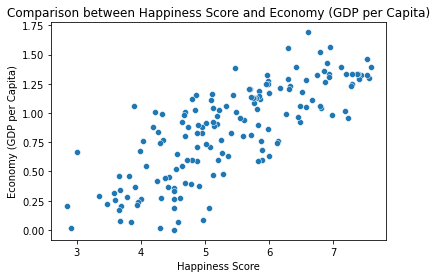

In [48]:
plt.title('Comparison between Happiness Score and Economy (GDP per Capita)')
sns.scatterplot(x='Happiness Score',y='Economy (GDP per Capita)', data=df, palette='bright')
plt.show()

with increase in economy variable happiness score is also increasing 

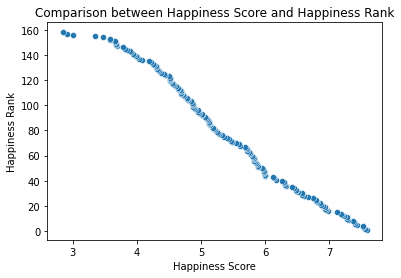

In [49]:
plt.title('Comparison between Happiness Score and Happiness Rank')
sns.scatterplot(x='Happiness Score',y='Happiness Rank', data=df, palette='bright')
plt.show()

"Happiness Score" and "Happiness Rank" are inversely proportiona to each other

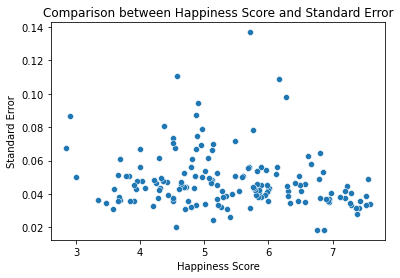

In [50]:
plt.title('Comparison between Happiness Score and Standard Error')
sns.scatterplot(x='Happiness Score',y='Standard Error', data=df, palette='bright')
plt.show()

There is no strong relationship between "standard Error" and "Happiness Score"

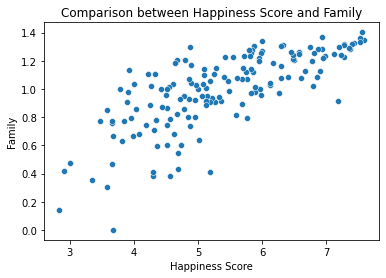

In [51]:
plt.title('Comparison between Happiness Score and Family')
sns.scatterplot(x='Happiness Score',y='Family', data=df, palette='bright')
plt.show()

"Family" and "Happiness Score" both are showing postive relationship with each other

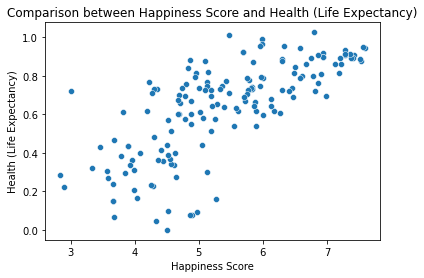

In [52]:
plt.title('Comparison between Happiness Score and Health (Life Expectancy)')
sns.scatterplot(x='Happiness Score',y='Health (Life Expectancy)', data=df, palette='bright')
plt.show()

"Health" and "Happiness Score" both are showing positive relation with each other

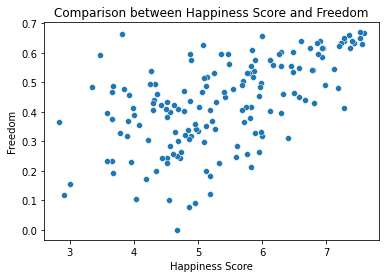

In [53]:
plt.title('Comparison between Happiness Score and Freedom')
sns.scatterplot(x='Happiness Score',y='Freedom', data=df, palette='bright')
plt.show()

with increase in "Freedom" "Happiness Score" is also increaseing 

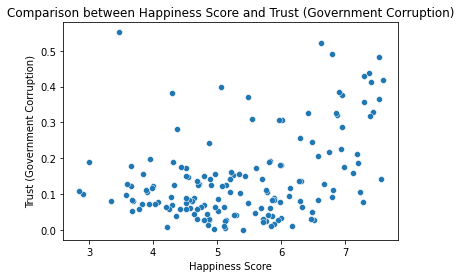

In [54]:
plt.title('Comparison between Happiness Score and Trust (Government Corruption)')
sns.scatterplot(x='Happiness Score',y='Trust (Government Corruption)', data=df, palette='bright')
plt.show()

Trust and Happiness Score both showing positive realtion with each other

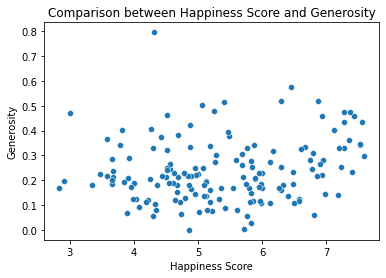

In [55]:
plt.title('Comparison between Happiness Score and Generosity')
sns.scatterplot(x='Happiness Score',y='Generosity', data=df, palette='bright')
plt.show()

There is no strong relationship between "Generosity" and "Happiness Score"

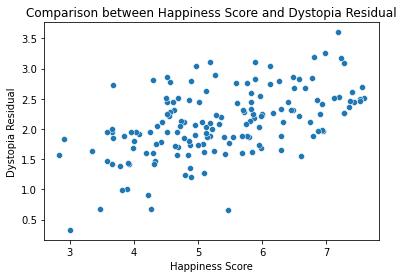

In [56]:
plt.title('Comparison between Happiness Score and Dystopia Residual')
sns.scatterplot(x='Happiness Score',y='Dystopia Residual', data=df, palette='bright')
plt.show()

with increase in happines score dystopia residual variable is also increasing 

# Multivarient Analysis

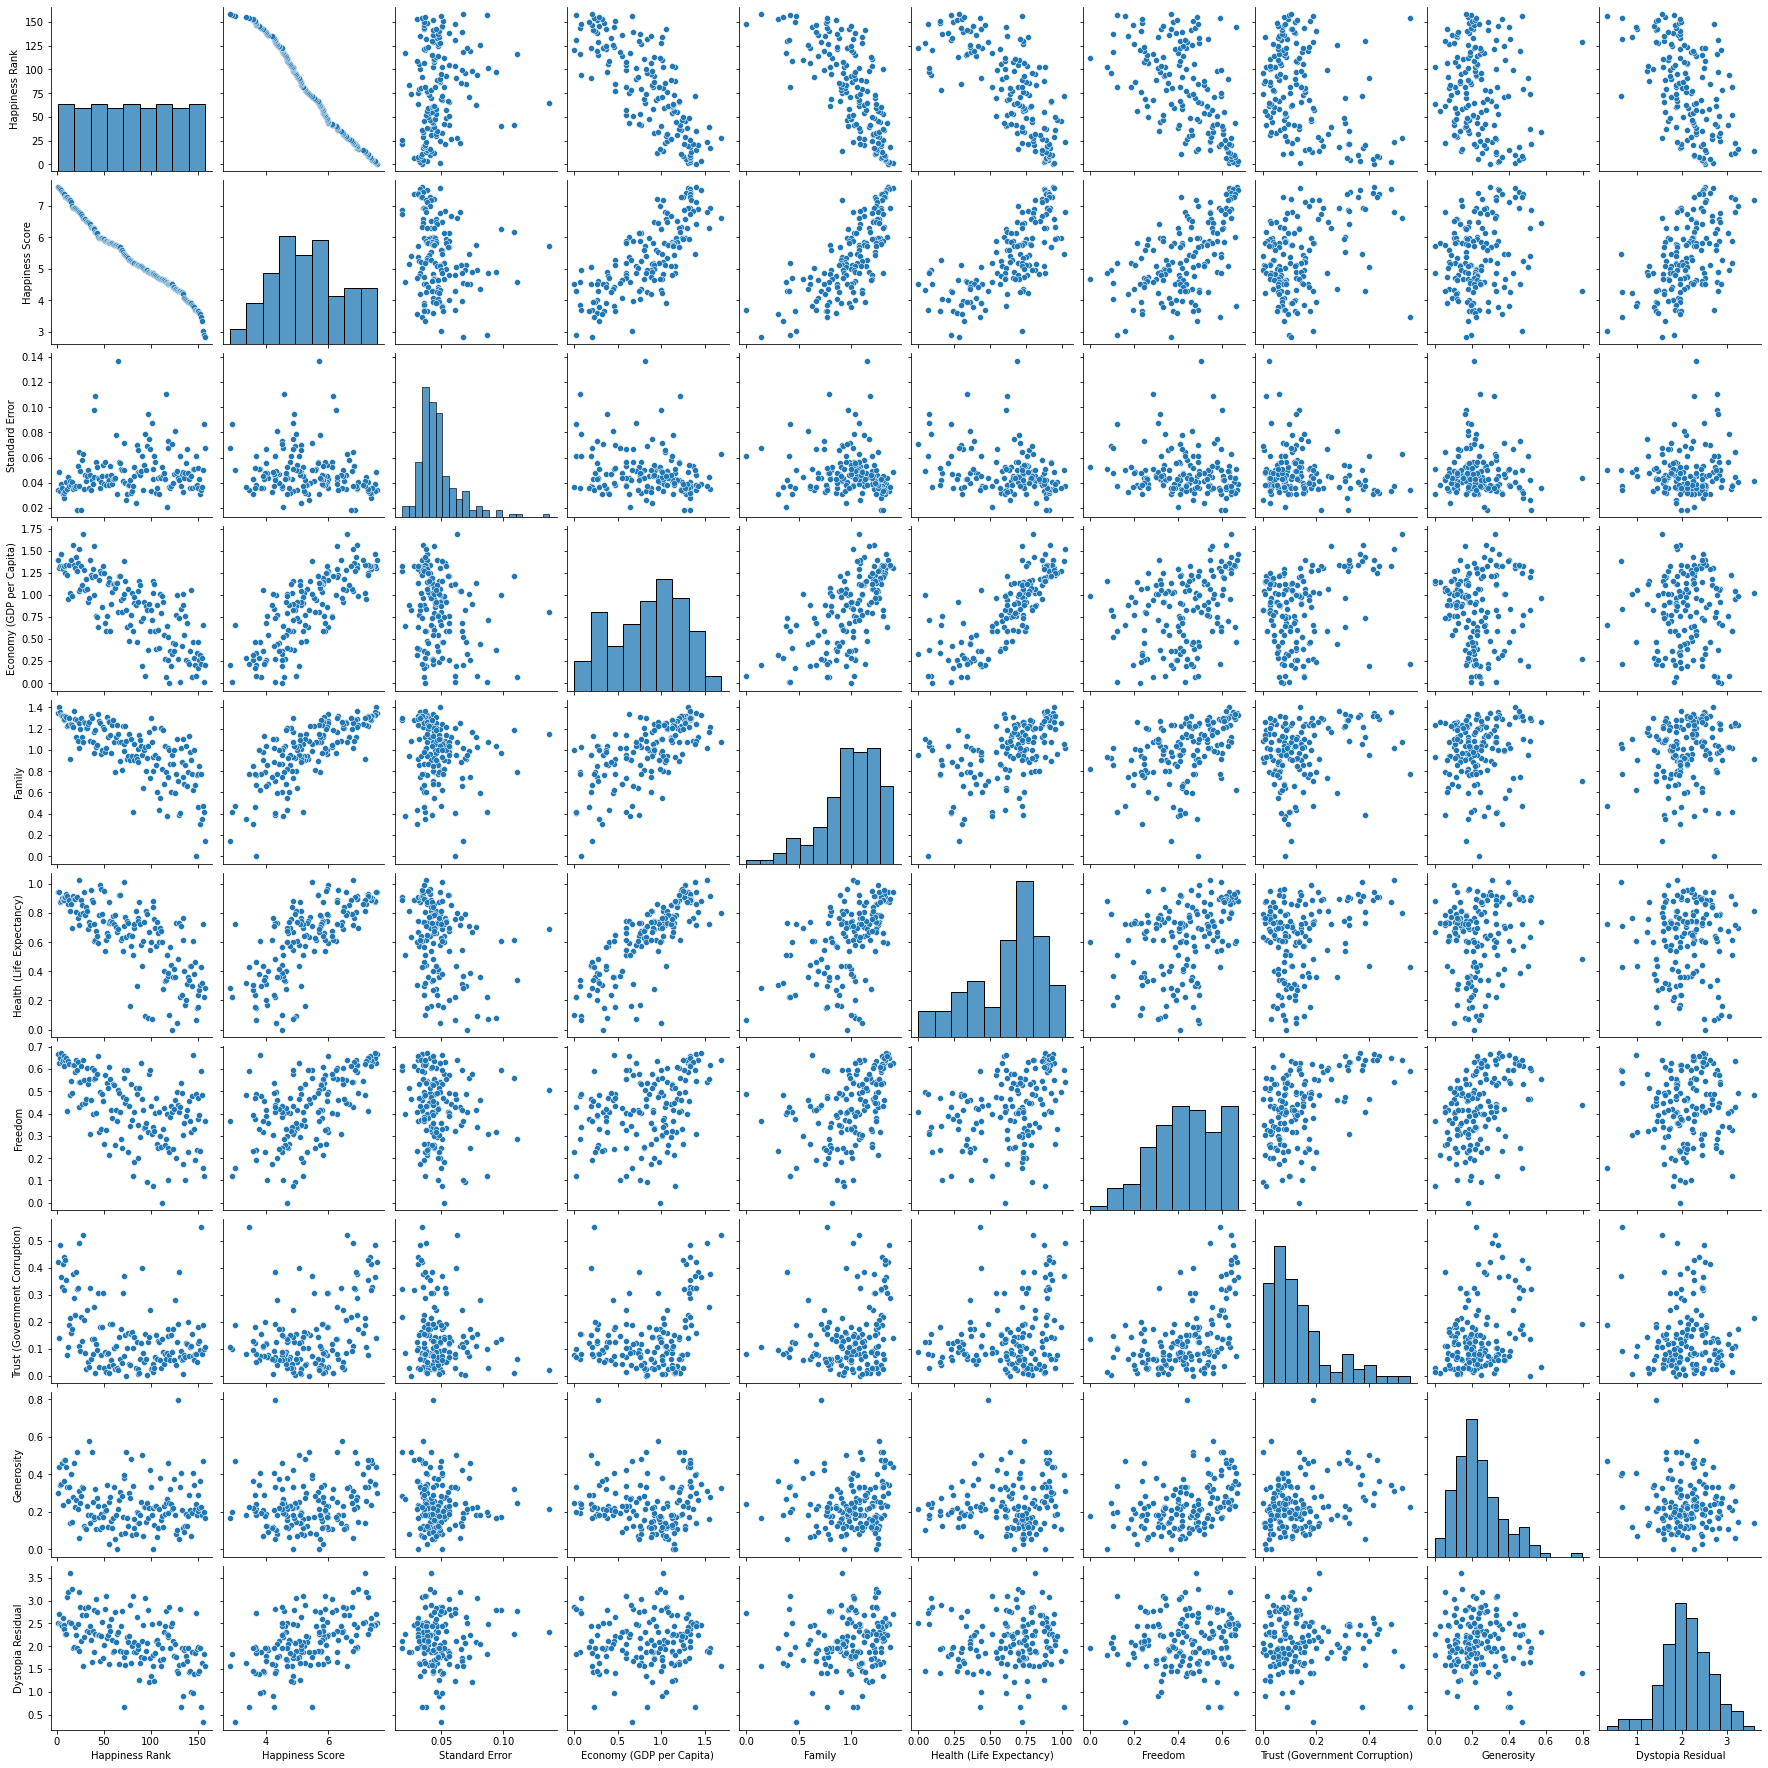

In [57]:
sns.pairplot(df,  palette='Dark2')

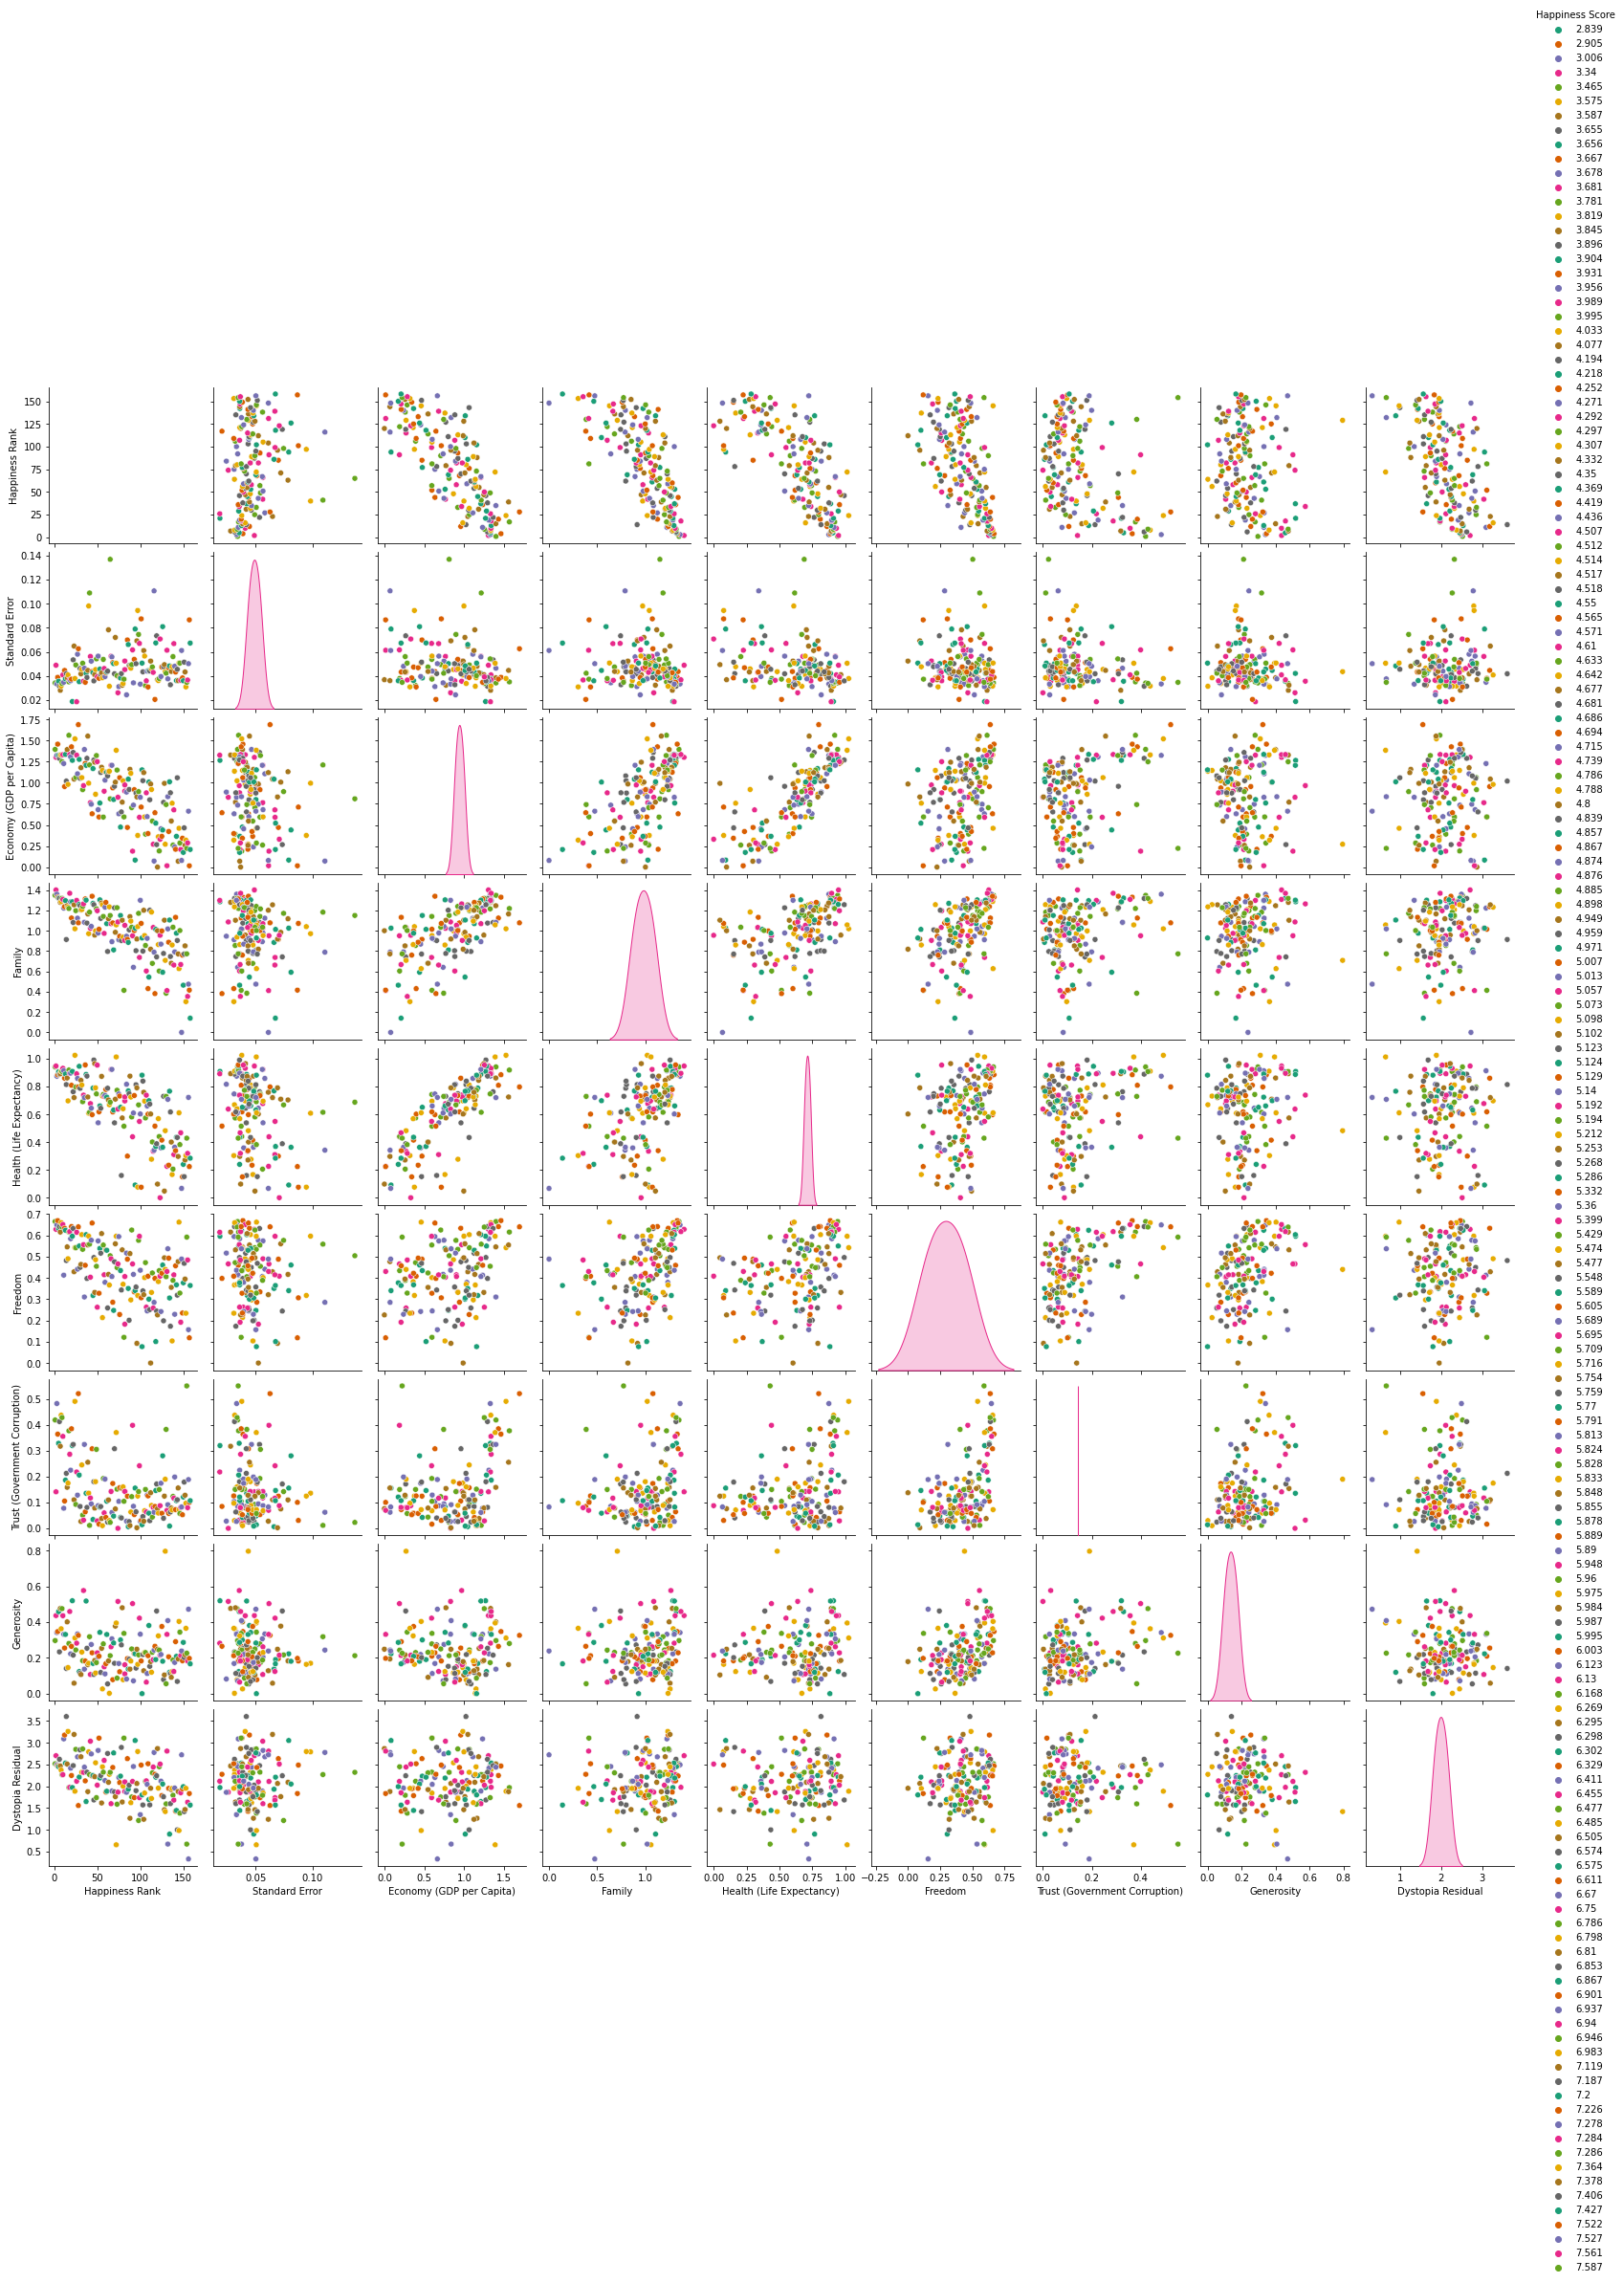

In [58]:
sns.pairplot(df,  palette='Dark2', hue='Happiness Score')

# Checking for the outliers

we never check outliers on categorical column and also from lable column it is always check on the continous column

<AxesSubplot:>

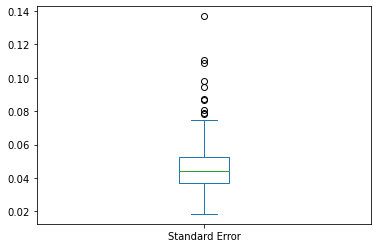

In [59]:
df['Standard Error'].plot.box()

There are some outliers present in "Standard Error"

<AxesSubplot:>

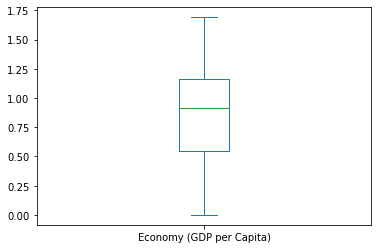

In [60]:
df['Economy (GDP per Capita)'].plot.box()

There is no outliers present in the "Economy" column

<AxesSubplot:>

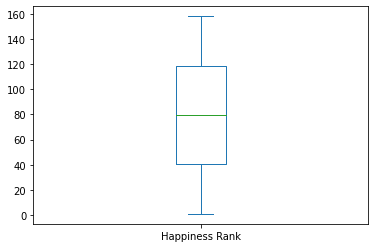

In [61]:
df['Happiness Rank'].plot.box()

There are no outliers present in "Happiness Rank" column

<AxesSubplot:>

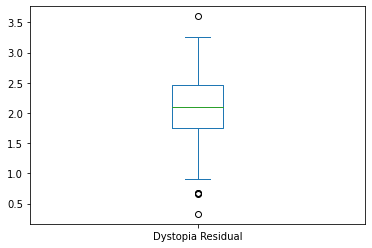

In [62]:
df['Dystopia Residual'].plot.box()

There are some outliers present in "Dystopia Residual "

<AxesSubplot:>

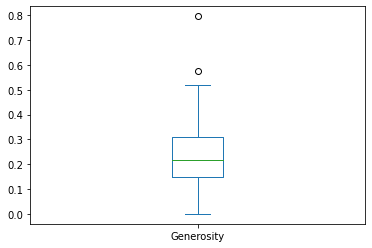

In [63]:
df['Generosity'].plot.box()

There are some  outliers present in "Generosity "

<AxesSubplot:>

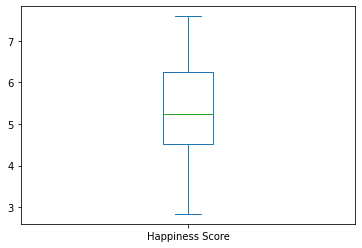

In [64]:
df['Happiness Score'].plot.box()

There is no outliers present in "Happiness Score "

<AxesSubplot:>

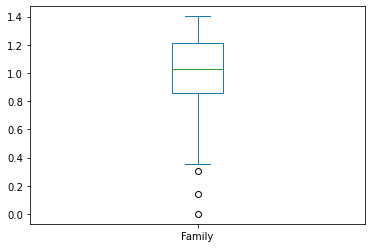

In [65]:
df['Family'].plot.box()

There are some outliers present in 'Family' column 

<AxesSubplot:>

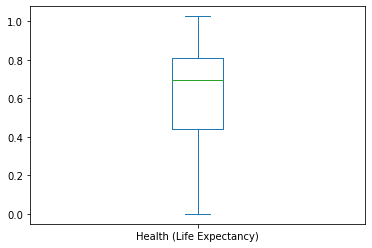

In [66]:
df['Health (Life Expectancy)'].plot.box()

There is no outliers present in the 'Health' column

<AxesSubplot:>

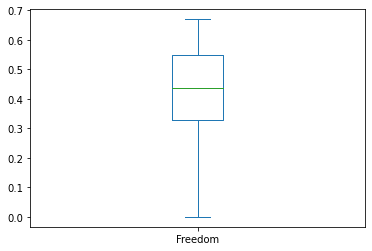

In [67]:
df['Freedom'].plot.box()

There is no outliers present in Freedom column

<AxesSubplot:>

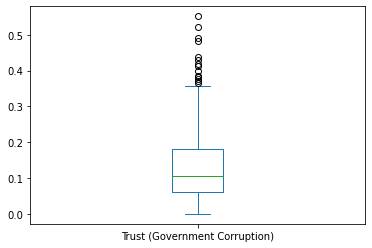

In [68]:
df['Trust (Government Corruption)'].plot.box()

There are some outliers present in "Trust" column 

Here by using box plot we can see that outliers are present in the dataset

# Removing outliers

In [69]:
#Removing outliers
from scipy.stats import zscore
col=df[['Trust (Government Corruption)', 'Family', 'Generosity', 'Dystopia Residual', 'Standard Error']]
z=np.abs(zscore(col))

z

,Trust (Government Corruption),Family,Generosity,Dystopia Residual,Standard Error
0,2.309652,1.320281,0.471040,0.758258,0.805926
1,0.016480,1.514458,1.575856,1.092857,0.055889
2,2.842774,1.361054,0.824293,0.712335,0.854487
3,1.852081,1.251922,0.868638,0.663893,0.531526
4,1.555725,1.221204,1.748563,0.639337,0.722845
...,...,...,...,...,...
153,3.413922,0.800520,0.087228,2.588925,0.774917
154,0.529210,2.346860,0.433117,0.843967,0.662582
155,0.381419,1.901086,1.856891,3.208430,0.132534
156,0.357715,2.118467,0.316950,0.481985,2.263962


In [70]:
threshold=3

print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([0, 4, 4, 4, 2, 1, 0, 3, 1], dtype=int64))


In [71]:
df_new=df[(z<3).all(axis=1)]

df_new

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [72]:
df.shape

(158, 12)

In [73]:
df_new.shape

(149, 12)

In [74]:
df=df_new

outliers are removed from the dataset

# Checking for skewness

skewness is also not remove from the categorical data and from target variable

accpectable range is from -0.5 to +0.5

In [75]:
#checking for skewness
df.skew()

Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

The columns Standard Error, Trust (Government Corruption), and Family have skewness in the data. since this columns are continous in nature lets use cube root method to remove skewness

In [76]:
#Removing skewness using cube root method
df['Standard Error']=np.cbrt(df['Standard Error'])
df['Family']=np.cbrt(df['Family'])
df['Trust (Government Corruption)']=np.cbrt(df['Trust (Government Corruption)'])

In [77]:
#Checking skewness agian
df.skew()

Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   0.528395
Economy (GDP per Capita)        -0.390657
Family                          -1.318995
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)   -0.064568
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

In [78]:
df['Family']=np.cbrt(df['Family'])

In [79]:
#Checking skewness agian
df.skew()

Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   0.528395
Economy (GDP per Capita)        -0.390657
Family                          -1.511471
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)   -0.064568
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

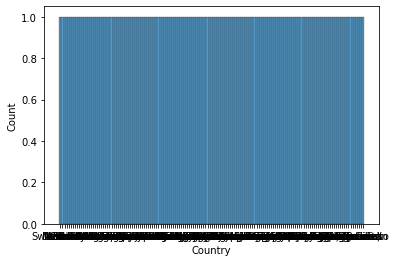

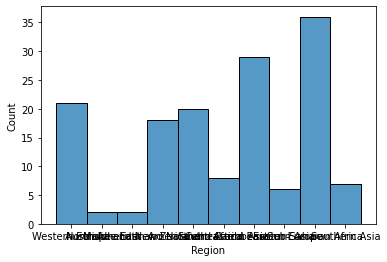

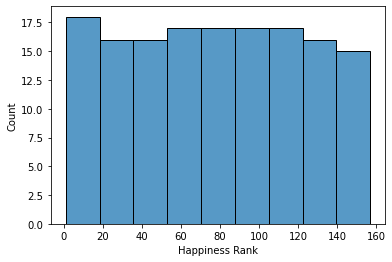

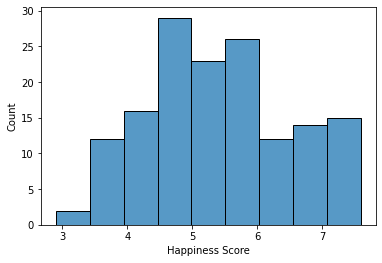

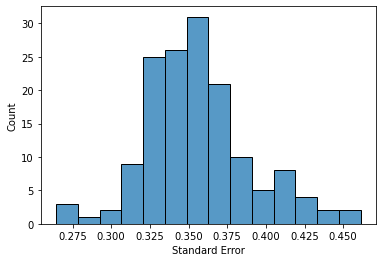

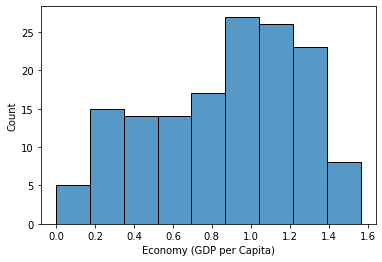

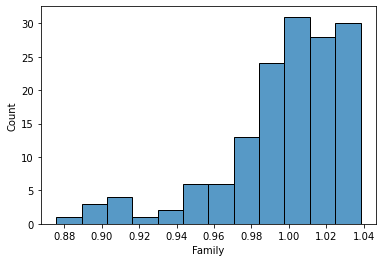

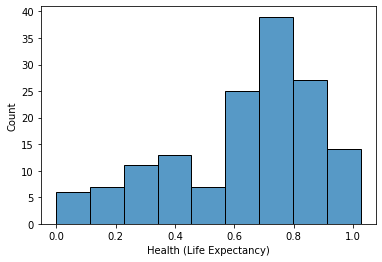

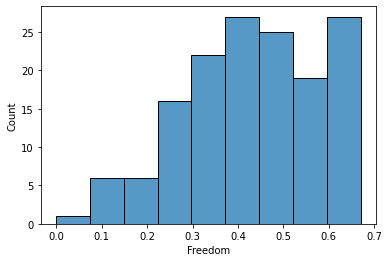

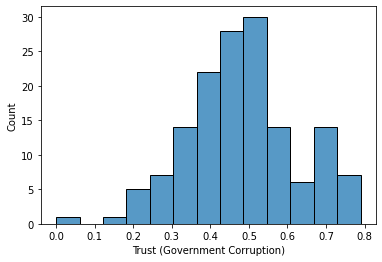

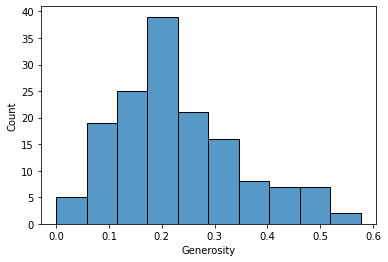

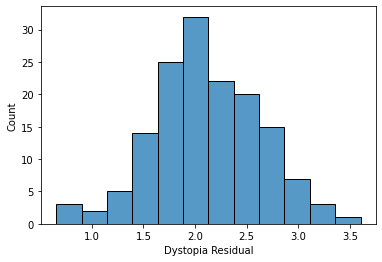

In [80]:
#checking for skewness by visualizing
for i in df.columns:
    sns.histplot(df[i])
    plt.show()

We have removed the skewness using cube root method

# Encoding Categorical Columns

In [81]:
#Encoding categorical columns using label Encoder

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=LE.fit_transform(df[i].values.reshape(-1,1))
        
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,129,9,1,7.587,0.324310,1.39651,1.033865,0.94143,0.66557,0.748756,0.29678,2.51738
1,57,9,2,7.561,0.365532,1.30232,1.038277,0.94784,0.62877,0.521036,0.43630,2.70201
2,36,9,3,7.527,0.321658,1.32548,1.034804,0.87464,0.64938,0.784910,0.34139,2.49204
3,101,9,4,7.522,0.338540,1.45900,1.032276,0.88521,0.66973,0.714677,0.34699,2.46531
4,24,5,5,7.427,0.328749,1.32629,1.031555,0.90563,0.63297,0.690742,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
150,65,8,151,3.655,0.371834,0.46534,0.971538,0.15185,0.46866,0.563805,0.20165,1.41723
151,20,8,152,3.587,0.350990,0.25812,0.982346,0.27125,0.39493,0.504388,0.21747,1.46494
152,0,7,153,3.575,0.313597,0.31982,0.875707,0.30335,0.23414,0.459770,0.36510,1.95210
154,13,8,155,3.340,0.331896,0.28665,0.890985,0.31910,0.48450,0.431066,0.18260,1.63328


In [ ]:
36,9,0.321658,1.32548,1.034804,0.87464,0.64938,0.784910,0.34139,2.49204    #7.527

We have converted the categorical columns into numerical columns using label encoder method

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 156
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        149 non-null    int32  
 1   Region                         149 non-null    int32  
 2   Happiness Rank                 149 non-null    int64  
 3   Happiness Score                149 non-null    float64
 4   Standard Error                 149 non-null    float64
 5   Economy (GDP per Capita)       149 non-null    float64
 6   Family                         149 non-null    float64
 7   Health (Life Expectancy)       149 non-null    float64
 8   Freedom                        149 non-null    float64
 9   Trust (Government Corruption)  149 non-null    float64
 10  Generosity                     149 non-null    float64
 11  Dystopia Residual              149 non-null    float64
dtypes: float64(9), int32(2), int64(1)
memory usage: 14

In [83]:
#statistical summary  
df.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,74.000000,5.080537,77.617450,5.429611,0.355591,0.862163,0.997033,0.638624,0.427449,0.481452,0.231500,2.120862
std,43.156691,3.032519,44.854208,1.111256,0.034449,0.387975,0.033291,0.245937,0.150864,0.142146,0.119897,0.525654
min,0.000000,0.000000,1.000000,2.905000,0.264383,0.000000,0.875707,0.000000,0.000000,0.000000,0.000000,0.654290
25%,37.000000,3.000000,39.000000,4.610000,0.332621,0.593250,0.986626,0.467210,0.328180,0.394637,0.142720,1.792930
50%,74.000000,4.000000,78.000000,5.268000,0.351989,0.920490,1.003847,0.703800,0.434500,0.474938,0.213330,2.100170
75%,111.000000,8.000000,115.000000,6.295000,0.370090,1.159910,1.022706,0.814440,0.546040,0.559568,0.300300,2.465310
max,148.000000,9.000000,157.000000,7.587000,0.461216,1.563910,1.038277,1.025250,0.669730,0.789498,0.576300,3.602140


 Observation=

After encoding the categorical columns we can see all columns details here.


The counts of all the columns are same that means no null values in the dataset. 


This describe method describe the count,mean,std.,IQR and max values of all the columns.

# Correlation between target variable and independent variables

In [84]:
#checking the correlation
cor=df.corr()
cor

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.009603,-0.125591,0.120329,-0.002321,0.039897,0.220054,0.037660,0.091689,0.041773,0.099905,0.048377
Region,0.009603,1.000000,0.184520,-0.145850,-0.047835,-0.224928,-0.144963,-0.334531,0.101335,0.211246,0.305791,-0.059494
Happiness Rank,-0.125591,0.184520,1.000000,-0.992921,0.219425,-0.773651,-0.671347,-0.736758,-0.571089,-0.365700,-0.225626,-0.526680
Happiness Score,0.120329,-0.145850,-0.992921,1.000000,-0.237228,0.773577,0.671150,0.729191,0.585066,0.394775,0.250903,0.528334
Standard Error,-0.002321,-0.047835,0.219425,-0.237228,1.000000,-0.244856,-0.071019,-0.343251,-0.202292,-0.095125,-0.155298,0.028798
Economy (GDP per Capita),0.039897,-0.224928,-0.773651,0.773577,-0.244856,1.000000,0.594681,0.817470,0.376780,0.231317,0.020730,0.026936
Family,0.220054,-0.144963,-0.671347,0.671150,-0.071019,0.594681,1.000000,0.467700,0.422118,0.138608,0.110125,0.097406
Health (Life Expectancy),0.037660,-0.334531,-0.736758,0.729191,-0.343251,0.817470,0.467700,1.000000,0.382595,0.158670,0.129328,0.031212
Freedom,0.091689,0.101335,-0.571089,0.585066,-0.202292,0.376780,0.422118,0.382595,1.000000,0.482062,0.428718,0.058596
Trust (Government Corruption),0.041773,0.211246,-0.365700,0.394775,-0.095125,0.231317,0.138608,0.158670,0.482062,1.000000,0.241413,0.107929


This gives the correlation between the dependent and independent variables. we cant visualize this by plotting heatmap

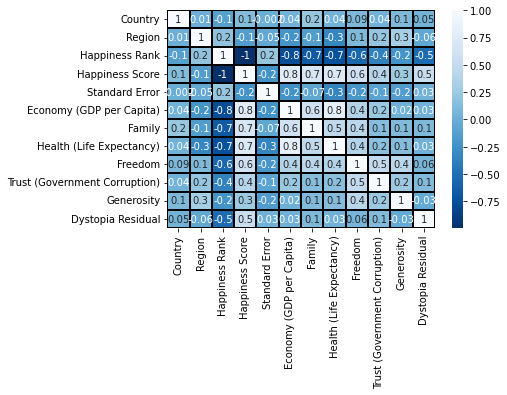

In [85]:
#visualizng the correlation matrix by plotting heatmap
sns.heatmap(df.corr(), linewidths=0.1, fmt='.1g', linecolor='black', annot=True, cmap='Blues_r')
plt.show()

In [86]:
cor['Happiness Score'].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.773577
Health (Life Expectancy)         0.729191
Family                           0.671150
Freedom                          0.585066
Dystopia Residual                0.528334
Trust (Government Corruption)    0.394775
Generosity                       0.250903
Country                          0.120329
Region                          -0.145850
Standard Error                  -0.237228
Happiness Rank                  -0.992921
Name: Happiness Score, dtype: float64

We can observe the positive and negative correlated features with the target

# Visualizing the correlation between label and features using bar plot

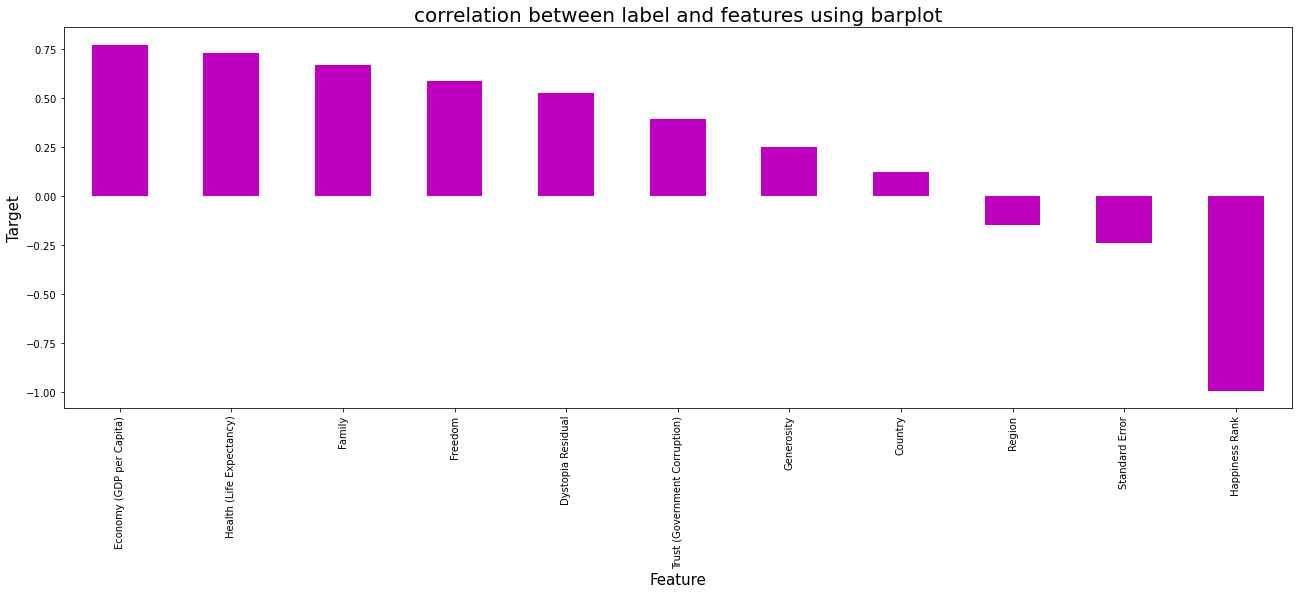

In [87]:
plt.figure(figsize=(22,7))
df.corr()['Happiness Score'].sort_values(ascending=False).drop(['Happiness Score']).plot(kind='bar',color='m')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title("correlation between label and features using barplot",fontsize=20)
plt.show()

From the above bar plot we can notice the positive and negative correlation between the features and the target. Here the features Happiness Rank and Standard Error have very less correlation with column and Economy (GDP per Capita) has higher relation with feature column.

# Seprating features and label

In [89]:
x=df.drop('Happiness Score', axis=1)
y=df['Happiness Score']

print('x=',x.shape)
print('y=',y.shape)

x= (149, 11)
y= (149,)


In [90]:
x

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,129,9,1,0.324310,1.39651,1.033865,0.94143,0.66557,0.748756,0.29678,2.51738
1,57,9,2,0.365532,1.30232,1.038277,0.94784,0.62877,0.521036,0.43630,2.70201
2,36,9,3,0.321658,1.32548,1.034804,0.87464,0.64938,0.784910,0.34139,2.49204
3,101,9,4,0.338540,1.45900,1.032276,0.88521,0.66973,0.714677,0.34699,2.46531
4,24,5,5,0.328749,1.32629,1.031555,0.90563,0.63297,0.690742,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
150,65,8,151,0.371834,0.46534,0.971538,0.15185,0.46866,0.563805,0.20165,1.41723
151,20,8,152,0.350990,0.25812,0.982346,0.27125,0.39493,0.504388,0.21747,1.46494
152,0,7,153,0.313597,0.31982,0.875707,0.30335,0.23414,0.459770,0.36510,1.95210
154,13,8,155,0.331896,0.28665,0.890985,0.31910,0.48450,0.431066,0.18260,1.63328


In [91]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 149, dtype: float64

# Feature Scalling Using Standard Scalarization

In [92]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.278724,1.296837,-1.713905,-0.911097,1.381916,1.110104,1.235390,1.583704,1.886835,0.546305,0.756876
1,-0.395242,1.296837,-1.691535,0.289534,1.138324,1.243067,1.261541,1.338953,0.279412,1.713898,1.109300
2,-0.883482,1.296837,-1.669166,-0.988343,1.198220,1.138402,0.962900,1.476027,2.142033,0.919630,0.708507
3,0.627737,1.296837,-1.646796,-0.496623,1.543526,1.062195,1.006023,1.611371,1.646273,0.966495,0.657485
4,-1.162476,-0.026647,-1.624427,-0.781797,1.200315,1.040472,1.089333,1.366887,1.477326,1.896418,0.631620
...,...,...,...,...,...,...,...,...,...,...,...
144,-0.209246,0.965966,1.641542,0.473095,-1.026255,-0.768388,-1.985941,0.274090,0.581308,-0.249803,-1.343100
145,-1.255474,0.965966,1.663911,-0.134003,-1.562163,-0.442663,-1.498813,-0.216276,0.161899,-0.117411,-1.252030
146,-1.720465,0.635095,1.686281,-1.223140,-1.402596,-3.656673,-1.367851,-1.285662,-0.153050,1.118051,-0.322135
147,-1.418221,0.965966,1.731020,-0.690149,-1.488379,-3.196209,-1.303594,0.379439,-0.355660,-0.409226,-0.930702


We have scaled the data using standard scalarization method to overcome the issue of biasness standard scaler will convert mean=0 and std=1

Now we check for the multicolinearity for this we use Variance Inflation factor(VIF) method

# Checking Variance Inflation factor(VIF)

In [93]:
#Finding varience inflation factor in each scaled column

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i)
            for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF Values,Features
0,1.075158,Country
1,1.500676,Region
2,72.007604,Happiness Rank
3,1.200633,Standard Error
4,13.473114,Economy (GDP per Capita)
5,4.993869,Family
6,8.046628,Health (Life Expectancy)
7,3.529755,Freedom
8,1.795869,Trust (Government Corruption)
9,2.287081,Generosity


if vif values=1 that means that columns has no relation with any other columns if more than more like 12 which means there is multicolinearity present and if any columns has vif values more than 5 or 10that column must be drop

By checking vif values we can find the features causing multicollinearity problem here we can find the feature Happiness Rank and Dystopia Residual have vif value greater than 10 which means they have high correlation with other features. we will drop one of the column first if the same issue exist then we will try to remove the column having high vif

In [94]:
#dropping totalcharges column
x.drop('Happiness Rank',axis=1,inplace=True)

In [95]:
#Finding varience inflation factor in each scaled column

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i)
            for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF Values,Features
0,1.072461,Country
1,1.442908,Region
2,1.199142,Standard Error
3,4.090946,Economy (GDP per Capita)
4,1.861645,Family
5,3.958684,Health (Life Expectancy)
6,1.896606,Freedom
7,1.423200,Trust (Government Corruption)
8,1.456167,Generosity
9,1.034857,Dystopia Residual


Here we can see that the multicolinierity problem is sloved

# Finding the best random state

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [97]:
#split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20)

In [98]:
x_train.shape

(119, 10)

In [99]:
x_test.shape

(30, 10)

In [100]:
y_train.shape

(119,)

In [101]:
y_test.shape

(30,)

In [102]:
for i in range(100):
    lr = LinearRegression()
    lr.random_state = i
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    print("Random state: {}, MSE: {}".format(i, mse))

Random state: 0, MSE: 0.004073800300290816
Random state: 1, MSE: 0.004073800300290816
Random state: 2, MSE: 0.004073800300290816
Random state: 3, MSE: 0.004073800300290816
Random state: 4, MSE: 0.004073800300290816
Random state: 5, MSE: 0.004073800300290816
Random state: 6, MSE: 0.004073800300290816
Random state: 7, MSE: 0.004073800300290816
Random state: 8, MSE: 0.004073800300290816
Random state: 9, MSE: 0.004073800300290816
Random state: 10, MSE: 0.004073800300290816
Random state: 11, MSE: 0.004073800300290816
Random state: 12, MSE: 0.004073800300290816
Random state: 13, MSE: 0.004073800300290816
Random state: 14, MSE: 0.004073800300290816
Random state: 15, MSE: 0.004073800300290816
Random state: 16, MSE: 0.004073800300290816
Random state: 17, MSE: 0.004073800300290816
Random state: 18, MSE: 0.004073800300290816
Random state: 19, MSE: 0.004073800300290816
Random state: 20, MSE: 0.004073800300290816
Random state: 21, MSE: 0.004073800300290816
Random state: 22, MSE: 0.00407380030029081

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

#split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20, random_state=i)

Here we can see that in range(0,100) for random state we are getting mean squared error value = 0.004073800300290816 so we can choose any random value from 0 to 100

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [105]:
lr.fit(x_train,y_train)

LinearRegression()

In [106]:
lr.coef_

array([-0.00893804, -0.00294298, -0.0177943 ,  0.41924214,  0.23771282,
        0.23212101,  0.15570623,  0.10625751,  0.13886783,  0.52920568])

In [107]:
lr.intercept_

5.437221288458086

In [108]:
lr.score(x_train,y_train) 

0.9972552431487461

In [109]:
pred=lr.predict(x_test)
print("predicted result:",pred)
print("actual ",y_test)

predicted result: [5.27733075 6.95569591 4.55664163 5.2259487  5.30711605 6.46400477
 5.63724634 3.77889858 5.48698075 5.05218666 4.64104283 7.24650775
 6.36958388 7.27635587 6.89898487 5.81893401 3.93235149 5.43769039
 5.86243751 4.10409046 6.48270292 4.39459665 6.73330982 4.30535495
 4.13745553 3.71292671 4.67662716 4.81393934 6.02399719 6.47319204
 6.76170087 7.00600792 5.65523886 7.25486038 5.94716986 4.68657951
 5.90510196 6.57819131 7.43243284 6.46872087 4.45367298 5.12832628
 5.11492902 6.9347817  7.33603044 5.14956715 3.99556569 3.71990311
 5.35754657 4.74851314]
actual  76     5.286
18     6.937
121    4.512
81     5.192
79     5.212
32     6.477
67     5.605
145    3.781
71     5.474
85     5.124
112    4.642
12     7.200
37     6.298
9      7.284
19     6.901
58     5.813
141    3.904
72     5.429
57     5.824
136    4.033
30     6.505
127    4.332
26     6.670
132    4.252
133    4.218
150    3.655
113    4.633
104    4.788
47     5.975
31     6.485
22     6.810
15     6.98

In [110]:
print('error:')

print("mean absolute error:",mean_absolute_error(y_test,pred))
print("mean squared error:",mean_squared_error(y_test,pred))

print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error: 0.03610396916301543
mean squared error: 0.00199970318268486
Root Mean squared error: 0.04471804090839468


In [111]:
from sklearn.metrics import r2_score
print (r2_score(y_test,pred))

0.998368433085033


# Predicting happiness score for random input

In [112]:
#predicting insurance costs 

t=np.array([9,1,0.324310,1.39651,1.001234,0.94143,0.66557,0.748756,0.29678,2.51738])

In [113]:
t.shape

(10,)

In [114]:
t=t.reshape(1,-1) #linear regression works on 2d thats why we use reshape to convert it into 2d 
t.shape

(1, 10)

In [115]:
predict=lr.predict(t)

In [117]:
print('Happiness score for given input is=',predict)    

Happiness score for given input is= [7.94669212]


# Conclusion

In [131]:
import numpy as np
a=np.array(y_test)
predict=np.array(lr.predict(x_test))
df_com=pd.DataFrame({'Original':a, 'Predicted':predict}, index=range(len(a)))
df_com

,Original,Predicted
0,5.286,5.277331
1,6.937,6.955696
2,4.512,4.556642
3,5.192,5.225949
4,5.212,5.307116
5,6.477,6.464005
6,5.605,5.637246
7,3.781,3.778899
8,5.474,5.486981
9,5.124,5.052187
